## Spliiting and saving the seizure and background segments of EEG to a separate folder

In [1]:
import pandas as pd
import mne
import ast
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

# Defining 21 channel list 

In [2]:
chl = ['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG A1-REF',
 'EEG A2-REF']

# Reading CSV with meta data of all files with Generalized Seizure

In [3]:
gnsz_data_frame = pd.read_csv('gnsz_eeg.csv', index_col='Unnamed: 0')

In [4]:
gnsz_data_frame

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
path,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...,D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/...
edf,"<RawEDF | 00004456_s015_t002.edf, 21 x 284928 ...","<RawEDF | 00004456_s015_t004.edf, 21 x 153856 ...","<RawEDF | 00007936_s007_t000.edf, 21 x 78080 (...","<RawEDF | 00007936_s007_t001.edf, 21 x 69120 (...","<RawEDF | 00007937_s003_t000.edf, 21 x 617216 ...","<RawEDF | 00008303_s001_t000.edf, 21 x 415232 ...","<RawEDF | 00008480_s004_t000.edf, 21 x 813056 ...","<RawEDF | 00009104_s006_t001.edf, 21 x 280064 ...","<RawEDF | 00009104_s006_t002.edf, 21 x 290816 ...","<RawEDF | 00009104_s006_t003.edf, 21 x 255232 ...",...,"<RawEDF | 00012940_s002_t009.edf, 21 x 153856 ...","<RawEDF | 00012940_s003_t000.edf, 21 x 76800 (...","<RawEDF | 00012940_s003_t001.edf, 21 x 153856 ...","<RawEDF | 00012940_s003_t002.edf, 21 x 76800 (...","<RawEDF | 00012940_s003_t004.edf, 21 x 76800 (...","<RawEDF | 00012940_s003_t005.edf, 21 x 163328 ...","<RawEDF | 00012941_s002_t000.edf, 21 x 76800 (...","<RawEDF | 00012941_s002_t001.edf, 21 x 153856 ...","<RawEDF | 00012941_s002_t006.edf, 21 x 153856 ...","<RawEDF | 00012941_s002_t007.edf, 21 x 258816 ..."
onset,"[0.0, 325.0234, 353.9688, 454.1289, 470.1211, ...","[0.0, 1.0, 5.0703, 195.0625, 203.0898, 445.089...","[0.0, 89.9453, 190.4648]","[0.0, 97.9414, 178.4844]","[0.0, 587.0, 605.0195]","[0.0, 115.9492, 136.5781, 221.3164, 245.2656, ...","[0.0, 436.9375, 786.9375]","[0.0, 516.2148, 634.1875]","[0.0, 544.9766, 664.1172]","[0.0, 467.0273, 603.8984]",...,"[0.0, 1.0, 600.0]","[0.0, 1.0, 299.0]","[0.0, 1.0, 600.0]","[0.0, 1.0, 299.0]","[0.0, 1.0, 299.0]","[0.0, 1.0, 637.0]","[0.0, 61.082, 299.0]","[0.0, 1.0, 600.0]","[0.0, 27.3828, 255.8242, 274.4727, 324.0859]","[0.0, 249.0117, 373.9297, 518.9609, 528.7148, ..."
end,"[325.0234, 353.9688, 454.1289, 470.1211, 487.0...","[1.0, 5.0703, 195.0625, 203.0898, 445.0898, 45...","[89.9453, 190.4648, 305.0]","[97.9414, 178.4844, 270.0]","[587.0, 605.0195, 2411.0]","[115.9492, 136.5781, 221.3164, 245.2656, 355.4...","[436.9375, 786.9375, 3176.0]","[516.2148, 634.1875, 1094.0]","[544.9766, 664.1172, 1136.0]","[467.0273, 603.8984, 997.0]",...,"[1.0, 600.0, 601.0]","[1.0, 299.0, 300.0]","[1.0, 600.0, 601.0]","[1.0, 299.0, 300.0]","[1.0, 299.0, 300.0]","[1.0, 637.0, 638.0]","[61.082, 299.0, 300.0]","[1.0, 600.0, 601.0]","[27.3828, 255.8242, 274.4727, 324.0859, 601.0]","[249.0117, 373.9297, 518.9609, 528.7148, 549.7..."
duration,"[325.0234, 28.9454, 100.1601, 15.9922, 16.9062...","[1.0, 4.0703, 189.9922, 8.0273, 242.0, 7.0313,...","[89.9453, 100.5195, 114.5352]","[97.9414, 80.543, 91.5156]","[587.0, 18.0195, 1805.9805]","[115.9492, 20.6289, 84.7383, 23.9492, 110.1407...","[436.9375, 350.0, 2389.0625]","[516.2148, 117.9727, 459.8125]","[544.9766, 119.1406, 471.8828]","[467.0273, 136.8711, 393.1016]",...,"[1.0, 599.0, 1.0]","[1.0, 298.0, 1.0]","[1.0, 599.0, 1.0]","[1.0, 298.0, 1.0]","[1.0, 298.0, 1.0]","[1.0, 636.0, 1.0]","[61.082, 237.918, 1.0]","[1.0, 599.0, 1.0]","[27.3828, 228.4414, 18.6485, 49.6132, 276.9141]","[249.0117

## Testing with example from CSV

In [5]:
i = 1

In [6]:
gnsz_data_frame[str(i)]['path']

'D:/TUH EEG Corpus/tuh_eeg/edf/train/01_tcp_ar/044/00004456/s015_2014_06_19/00004456_s015_t002.tse'

In [7]:
ast.literal_eval(gnsz_data_frame[str(i)]['onset'])

[0.0,
 325.0234,
 353.9688,
 454.1289,
 470.1211,
 487.0273,
 501.0664,
 523.1563,
 550.1055,
 694.2227,
 710.082]

In [8]:
ast.literal_eval(gnsz_data_frame[str(i)]['end'])

[325.0234,
 353.9688,
 454.1289,
 470.1211,
 487.0273,
 501.0664,
 523.1563,
 550.1055,
 694.2227,
 710.082,
 1113.0]

In [9]:
gnsz_data_frame[str(i)]['duration'].strip('][').split(', ')

['325.0234',
 '28.9454',
 '100.1601',
 '15.9922',
 '16.9062',
 '14.0391',
 '22.0899',
 '26.9492',
 '144.1172',
 '15.8593',
 '402.918']

In [10]:
ast.literal_eval(gnsz_data_frame[str(i)]['description'])

['bckg',
 'gnsz',
 'bckg',
 'gnsz',
 'bckg',
 'gnsz',
 'bckg',
 'gnsz',
 'bckg',
 'gnsz',
 'bckg']

# Splitting Each File into Background and Seizure

In [12]:
for iter in gnsz_data_frame.columns:
    raw = mne.io.read_raw_edf(gnsz_data_frame[str(iter)]['path'][:-4]+'.edf', preload=True)
    bite, gite = (0,0)
    for (tmin, tmax, typ) in zip(ast.literal_eval(gnsz_data_frame[str(iter)]['onset']), ast.literal_eval(gnsz_data_frame[str(iter)]['end']), ast.literal_eval(gnsz_data_frame[str(iter)]['description'])):
        temp = raw.copy()
        if typ == 'gnsz':
            save_path = "D:/College Work/Major Project/Dataset/gnsz/" + gnsz_data_frame[str(iter)]['path'].split('/')[8] + '-' + gnsz_data_frame[str(iter)]['path'].split('/')[9][:-4] + '-' + str(gite)  + '.fif'
            temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
            gite = gite + 1
        elif typ == 'bckg':
            save_path = "D:/College Work/Major Project/Dataset/bckg/" + gnsz_data_frame[str(iter)]['path'].split('/')[8] + '-' + gnsz_data_frame[str(iter)]['path'].split('/')[9][:-4] + '-' + str(bite) + '.fif'
            temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax) 
            bite = bite + 1    

Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\044\00004456\s015_2014_06_19\00004456_s015_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 284927  =      0.000 ...  1112.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-2.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-4.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-5.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-5.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\044\00004456\s015_2014_06_19\00004456_s015_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t002-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t004-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t004-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t004-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-2.fif
[done]
Writing D:\College Work\Major Project\Dataset

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s015_2014_06_19-00004456_s015_t004-3.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\079\00007936\s007_2014_08_21\00007936_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78079  =      0.000 ...   304.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t001-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\079\00007937\s003_2015_04_01\00007937_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 617215  =      0.000 ...  2410.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s007_2014_08_21-00007936_s007_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s007_2014_08_21-00007936_s007_t001-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_01-00007937_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_01-00007937_s003_t000-0.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_01-00007937_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_01-00007937_s003_t000-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\083\00008303\s001_2011_11_23\00008303_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 415231  =      0.000 ...  1621.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-1.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-2.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-3.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-5.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-5.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-5.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-5.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-6.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-6.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-6.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-6.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-7.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-7.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-7.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-7.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-8.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-8.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-8.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-8.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-9.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-9.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-9.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-9.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-10.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-10.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-10.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-10.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-11.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-11.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\084\00008480\s004_2012_11_09\00008480_s004_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 813055  =      0.000 ...  3175.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2011_11_23-00008303_s001_t000-10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2011_11_23-00008303_s001_t000-10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-0.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s004_2012_11_09-00008480_s004_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\gnsz\s004_2012_11_09-00008480_s004_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2012_11_09-00008480_s004_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Closing D:\College Work\Major Project\Dataset\bckg\s004_2012_11_09-00008480_s004_t000-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 280063  =      0.000 ...  1093.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t001-0.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t001-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 290815  =      0.000 ...  1135.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t002-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 255231  =      0.000 ...   996.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t003-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278783  =      0.000 ...  1088.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t004-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t004-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t004-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t004-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 246783  =      0.000 ...   963.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t007-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t007-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t007-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t007-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t007-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t007-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t007-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t007-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s006_2014_09_23\00009104_s006_t021.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 452607  =      0.000 ...  1767.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t021-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t021-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t021-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t021-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t021-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t021-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_23-00009104_s006_t021-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_23-00009104_s006_t021-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s007_2014_09_24\00009104_s007_t015.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 185087  =      0.000 ...   722.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s007_2014_09_24-00009104_s007_t015-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s007_2014_09_24-00009104_s007_t015-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s007_2014_09_24-00009104_s007_t015-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s007_2014_09_24-00009104_s007_t015-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s007_2014_09_24-00009104_s007_t015-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s007_2014_09_24-00009104_s007_t015-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s007_2014_09_24-00009104_s007_t015-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s007_2014_09_24-00009104_s007_t015-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_09_25-00009104_s009_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_09_25-00009104_s009_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s009_2014_09_25-00009104_s009_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s009_2014_09_25-00009104_s009_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_09_25-00009104_s009_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_09_25-00009104_s009_t003-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\091\00009104\s010_2014_09_26\00009104_s010_t015.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120575  =      0.000 ...   470.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s009_2014_09_25-00009104_s009_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s009_2014_09_25-00009104_s009_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s010_2014_09_26-00009104_s010_t015-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s010_2014_09_26-00009104_s010_t015-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s010_2014_09_26-00009104_s010_t015-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s010_2014_09_26-00009104_s010_t015-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s010_2014_09_26-00009104_s010_t015-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s010_2014_09_26-00009104_s010_t015-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\092\00009232\s004_2012_10_11\00009232_s004_t010.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 147967  =      0.000 ...   577.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s010_2014_09_26-00009104_s010_t015-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s010_2014_09_26-00009104_s010_t015-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s004_2012_10_11-00009232_s004_t010-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2012_10_11-00009232_s004_t010-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s004_2012_10_11-00009232_s004_t010-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2012_10_11-00009232_s004_t010-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2012_10_11-00009232_s004_t010-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2012_10_11-00009232_s004_t010-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\096\00009623\s005_2012_10_20\00009623_s005_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 253695  =      0.000 ...   990.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2012_10_11-00009232_s004_t010-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s004_2012_10_11-00009232_s004_t010-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-0.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\096\00009623\s005_2012_10_20\00009623_s005_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216575  =      0.000 ...   845.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t003-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t005-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t005-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t005-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t005-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\096\00009623\s005_2012_10_20\00009623_s005_t008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 202495  =      0.000 ...   790.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t008-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t008-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t008-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t008-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t008-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t008-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s005_2012_10_20-00009623_s005_t008-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s005_2012_10_20-00009623_s005_t008-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_09_25-00009852_s003_t006-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_09_25-00009852_s003_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_09_25-00009852_s003_t006-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_09_25-00009852_s003_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_09_25-00009852_s003_t006-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_09_25-00009852_s003_t006-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\099\00009932\s006_2014_10_02\00009932_s006_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_10_02-00009932_s006_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_10_

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_09_25-00009852_s003_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2013_09_25-00009852_s003_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_10_02-00009932_s006_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_10_02-00009932_s006_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_10_02-00009932_s006_t003-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\099\00009934\s002_2013_03_16\00009934_s002_t006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133119  =      0.000 ...   519.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-0.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_10_02-00009932_s006_t003-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2013_03_16-00009934_s002_t006-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2013_03_16-00009934_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\100\00010020\s001_2013_03_23\00010020_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228863  =      0.000 ...   893.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2013_03_16-00009934_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2013_03_16-00009934_s002_t006-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-2.fif
[done]
Writing D:\College Work\Major Project\Dataset

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-5.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-5.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-5.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-5.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-6.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-6.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-6.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-6.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-7.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-7.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-7.fif
Closing D:\College Work\Major Project\Dataset

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-8.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-8.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-8.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-8.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-9.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-9.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-9.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-9.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-10.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-10.fif
[done]
Writing D:\College Work\Major Project\Datas

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-11.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-11.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-12.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-12.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-12.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-12.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-13.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-13.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-13.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-13.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-14.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-14.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-15.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-15.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-15.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-15.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-16.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-16.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-16.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-16.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-17.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-17.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-18.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-18.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-18.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-18.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-19.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-19.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-19.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-19.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-20.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-20.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-21.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-21.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-21.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-21.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-22.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-22.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-22.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-22.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-24.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-24.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-24.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-24.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-25.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-25.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-25.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-25.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-26.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-26.fif
[done]
Writing D:\College Work\Majo

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-27.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-27.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-27.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-27.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-28.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-28.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\100\00010020\s001_2013_03_23\00010020_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 326143  =      0.000 ...  1273.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t000-27.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t000-27.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-2.fif
[done]
Writing D:\College Work\Major Project\Dataset

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-5.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-5.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-5.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-5.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-6.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-6.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-6.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-6.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-7.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-7.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: Run

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-7.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-7.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-8.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-8.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-8.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-8.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-9.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-9.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-9.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-9.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-10.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-10.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-10.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-10.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-11.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-11.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-11.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-11.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-12.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-12.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-13.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-13.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-13.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-13.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-14.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-14.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-14.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-14.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-15.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-15.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-15.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-15.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-16.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-16.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-16.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-16.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-17.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-17.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-17.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-17.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-18.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-18.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-18.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-18.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-19.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-19.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-19.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-19.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-20.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-20.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-20.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-20.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-21.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-21.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-21.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-21.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-22.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-22.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-22.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-22.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-20.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-23.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-23.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-23.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-23.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-24.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-24.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-24.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-24.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-25.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-25.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-25.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-25.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-26.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-26.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-26.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-26.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-27.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-27.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-27.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-27.fif
[done]
Writing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-28.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-28.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-28.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-29.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-29.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-29.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-29.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-30.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-30.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-30.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-28.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-29.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-30.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-31.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-31.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-31.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-31.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-32.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-32.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-32.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-32.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-33.fif
Closing D:\College Work\Major Proje

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-33.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-33.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-34.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-34.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-34.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-34.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-35.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-35.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-35.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-35.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-33.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-34.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-36.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-36.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-36.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-36.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-37.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-37.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-37.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-37.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-38.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-38.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-36.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-36.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-38.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-38.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-39.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-39.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-39.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-39.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-40.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-40.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-40.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-40.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-38.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-39.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: R

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-41.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-41.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-41.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-41.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-42.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-42.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-42.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-42.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-43.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-43.fif
[done]
Extracting EDF parameters fr

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2013_03_23-00010020_s001_t001-41.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2013_03_23-00010020_s001_t001-41.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 264447  =      0.000 ...  1032.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-1.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t000-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t000-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\101\00010158\s003_2013_01_14\00010158_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t000-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t001-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\101\00010158\s003_2013_01_14\00010158_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 237823  =      0.000 ...   928.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t002-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t002-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2013_01_14-00010158_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\107\00010760\s002_2013_09_18\00010760_s002_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 265471  =      0.000 ...  1036.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2013_01_14-00010158_s003_t002-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-2.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-3.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2013_09_18-00010760_s002_t002-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2013_09_18-00010760_s002_t002-4.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\108\00010843\s009_2014_10_07\00010843_s009_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 47103  =      0.000 ...   183.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\108\00010843\s009_2014_10_07\00010843_s009_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 67327  =      0.000 ...   262.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s009_2014_10_

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s009_2014_10_07-00010843_s009_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s009_2014_10_07-00010843_s009_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_02_19-00011272_s003_t006-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_02_19-00011272_s003_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2014_02_19-00011272_s003_t006-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2014_02_19-00011272_s003_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_02_19-00011272_s003_t006-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_02_19-00011272_s003_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2014_02_19-00011272_s003_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_02_19-00011272_s003_t006-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\118\00011870\s001_2014_08_13\00011870_s001_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 20991  =      0.000 ...    81.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-2.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-3.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-5.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2014_08_13-00011870_s001_t003-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s001_2014_08_13-00011870_s001_t003-5.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\118\00011870\s003_2014_08_13\00011870_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 475391  =      0.000 ...  1856.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-0.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Closing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-2.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t001-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t001-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\118\00011870\s003_2014_08_13\00011870_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 235263  =      0.000 ...   918.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t002-0.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\118\00011870\s003_2014_08_13\00011870_s003_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 300543  =      0.000 ...  1173.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2014_08_13-00011870_s003_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\119\00011972\s004_2014_09_17\00011972_s004_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164607  =      0.000 ...   642.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2014_08_13-00011870_s003_t003-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t001-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-2.fif
[done]
Writing D:\College Work\Major Project\Dataset

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-3.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\119\00011972\s004_2014_09_17\00011972_s004_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 288511  =      0.000 ...  1126.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t001-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t003-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-1.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t003-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s004_2014_09_17-00011972_s004_t003-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\119\00011972\s006_2014_09_17\00011972_s006_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 233983  =      0.000 ...   913.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s004_2014_09_17-00011972_s004_t003-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-1.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-2.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\127\00012707\s003_2015_01_29\00012707_s003_t007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122111  =      0.000 ...   476.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t007-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t007-0.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s006_2014_09_17-00011972_s006_t001-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s006_2014_09_17-00011972_s006_t001-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t007-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t007-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t007-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t007-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\127\00012707\s003_2015_01_29\00012707_s003_t009.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t007-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t007-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t009-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t009-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t009-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t009-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t009-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t009-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s001_2015_04_26\00012940_s001_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 547071  =      0.000 ...  2136.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_01_29-00012707_s003_t009-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_01_29-00012707_s003_t009-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s001_2015_04_26-00012940_s001_t003-0.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s001_2015_04_26-00012940_s001_t003-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Closing D:\College Work\Major Project\Dataset\gnsz\s001_2015_04_26-00012940_s001_t003-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s002_2015_04_26\00012940_s002_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s001_2015_04_26-00012940_s001_t003-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)


Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s002_2015_04_26\00012940_s002_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t005-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t005-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t005-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t005-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s002_2015_04_26\00012940_s002_t006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t006-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t006-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t006-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t006-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s002_2015_04_26\00012940_s002_t008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t008-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t008-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t008-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t008-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t008-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t008-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s002_2015_04_26\00012940_s002_t009.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t008-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t008-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t009-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t009-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t009-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t009-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t009-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t009-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s003_2015_04_27\00012940_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_26-00012940_s002_t009-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_26-00012940_s002_t009-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t000-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s003_2015_04_27\00012940_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t001-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s003_2015_04_27\00012940_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t002-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t002-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t002-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t002-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s003_2015_04_27\00012940_s003_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t002-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t004-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t004-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t004-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t004-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t004-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012940\s003_2015_04_27\00012940_s003_t005.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 163327  =      0.000 ...   637.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t004-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t005-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t005-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t005-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t005-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t005-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012941\s002_2015_04_19\00012941_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s003_2015_04_27-00012940_s003_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s003_2015_04_27-00012940_s003_t005-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t000-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t000-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t000-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t000-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t000-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012941\s002_2015_04_19\00012941_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t000-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t001-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t001-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t001-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t001-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t001-1.fif
[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012941\s002_2015_04_19\00012941_s002_t006.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t001-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t006-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t006-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t006-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t006-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-2.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t006-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

[done]
Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\129\00012941\s002_2015_04_19\00012941_s002_t007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 258815  =      0.000 ...  1010.996 secs...
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-0.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-0.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-0.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-1.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-1.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-1.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_

C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-2.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-2.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-2.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-3.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-3.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-3.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-3.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-4.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-4.fif
Closing D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-4.fif
[done]
Writing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-5.fif
Closing D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-5.fif
[done]


C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\bckg\s002_2015_04_19-00012941_s002_t007-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:8: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s002_2015_04_19-00012941_s002_t007-4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  temp.save(save_path, picks=chl, tmin=tmin, tmax=tmax)
C:\Users\Irfan\AppData\Local\Temp/ipykernel_1400/4099002510.py:12: Ru

# Checking with examples

In [15]:
iter

'1'

In [66]:
gnsz_data_frame[str(iter)]['path'].split('/')[9][:-4]

'00004456_s015_t002'

In [69]:
save_path = "D:/College Work/Major Project/Dataset/gnsz/" + gnsz_data_frame[str(iter)]['path'].split('/')[8] + '-' + gnsz_data_frame[str(iter)]['path'].split('/')[9][:-4] + '.fif'
raw = mne.io.read_raw_edf(gnsz_data_frame[str(iter)]['path'][:-4]+'.edf', preload=True)
raw.save(save_path, picks=chl, tmin=0, tmax=10)

Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\044\00004456\s015_2014_06_19\00004456_s015_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 284927  =      0.000 ...  1112.996 secs...
Writing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002.fif


C:\Users\Irfan\AppData\Local\Temp/ipykernel_11880/1925969976.py:3: RuntimeWarning: This filename (D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(save_path, picks=chl, tmin=0, tmax=10)


Closing D:\College Work\Major Project\Dataset\gnsz\s015_2014_06_19-00004456_s015_t002.fif
[done]


In [70]:
new = mne.io.read_raw_fif(save_path)

Opening raw data file D:/College Work/Major Project/Dataset/gnsz/s015_2014_06_19-00004456_s015_t002.fif...
Isotrak not found
    Range : 0 ... 2560 =      0.000 ...    10.000 secs
Ready.


C:\Users\Irfan\AppData\Local\Temp/ipykernel_11880/1403424846.py:1: RuntimeWarning: This filename (D:/College Work/Major Project/Dataset/gnsz/s015_2014_06_19-00004456_s015_t002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  new = mne.io.read_raw_fif(save_path)


In [77]:
new

<Raw | s015_2014_06_19-00004456_s015_t002.fif, 21 x 2561 (10.0 s), ~27 kB, data not loaded>

In [76]:
orig

<RawEDF | 00004456_s015_t002.edf, 21 x 2561 (10.0 s), ~445 kB, data loaded>

In [61]:
orig = mne.io.read_raw_edf(gnsz_data_frame[str(iter)]['path'][:-4]+'.edf', preload=True).pick_channels(chl).crop(tmin=0, tmax=10)

Extracting EDF parameters from D:\TUH EEG Corpus\tuh_eeg\edf\train\01_tcp_ar\044\00004456\s015_2014_06_19\00004456_s015_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 284927  =      0.000 ...  1112.996 secs...


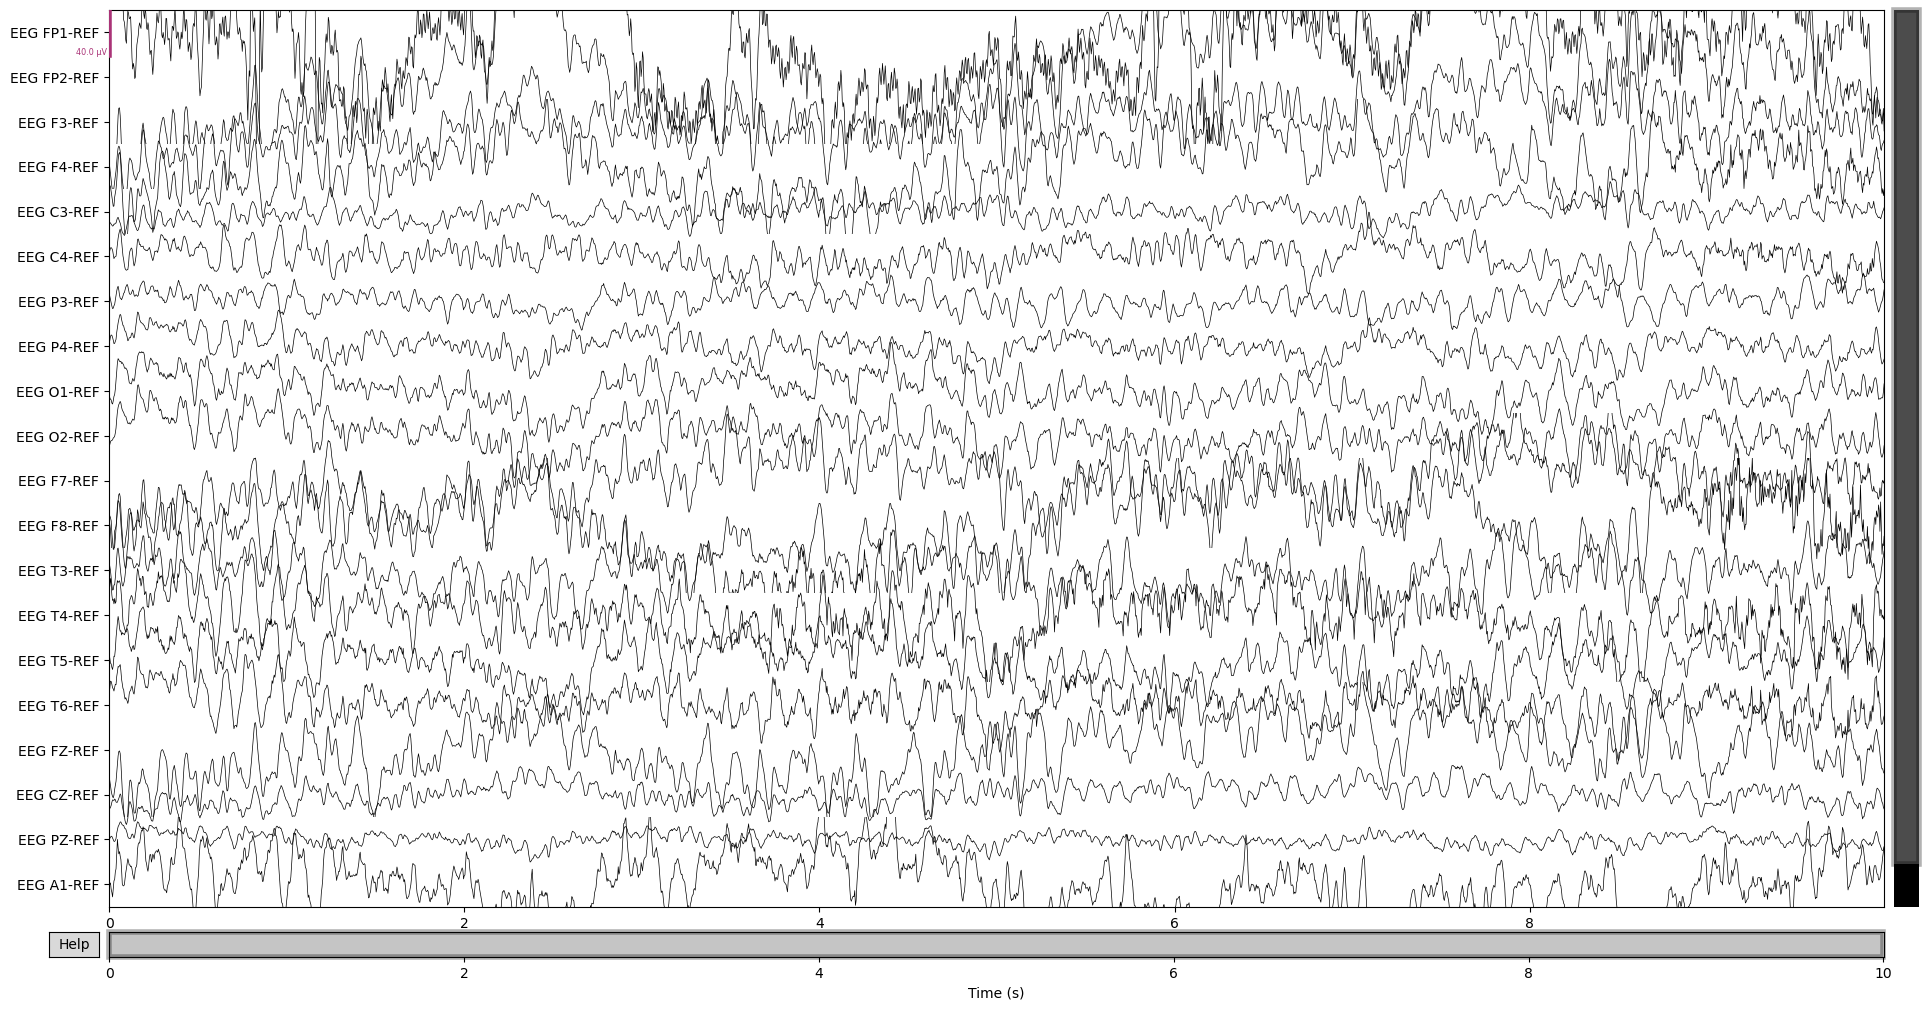

Channels marked as bad: none


In [62]:
orig.plot()